# Building The Model With Different Algorithmn 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("Processed_Customer_data.xlsx")

In [4]:
df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender,Location
0,1,63,17,73.36,236,0,1,0
1,2,62,1,48.76,172,0,0,1
2,3,24,5,85.47,460,0,0,0
3,4,36,3,97.94,297,1,0,2
4,5,46,19,58.14,266,0,0,2


In [5]:
X = df.drop(columns=["Churn", "CustomerID"])
Y = df["Churn"]

In [6]:
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender,Location
0,63,17,73.36,236,1,0
1,62,1,48.76,172,0,1
2,24,5,85.47,460,0,0
3,36,3,97.94,297,0,2
4,46,19,58.14,266,0,2


In [7]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [8]:
pos = Y == 1
neg = Y == 0
X_plot = np.array(X)

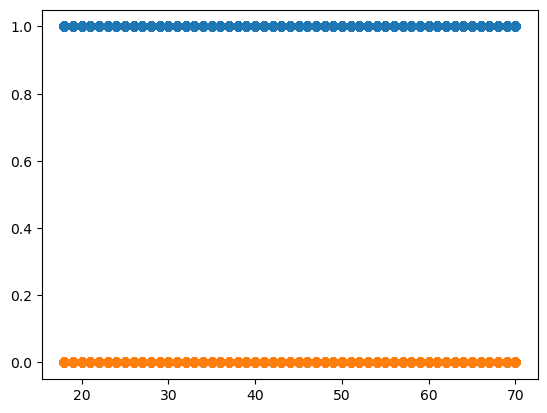

In [9]:
# Visualising The Data With respect to Age Feature
plt.scatter(X_plot[:, 0][pos], Y[pos])
plt.scatter(X_plot[:, 0][neg], Y[neg])

# Train Test Split

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [12]:
X_train.shape

(70000, 6)

In [13]:
Y_train.shape

(70000,)

# By Neural Network

In [14]:
model1 = Sequential([
    tf.keras.Input(shape=(6,)),
    Dense(units=500, activation='relu', input_shape=(6,)),
    Dense(units=400, activation='relu'),
    Dense(units=300, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3500      
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 324501 (1.24 MB)
Trainable params: 324501 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)
model1.fit(X_train, Y_train, epochs=10, batch_size=100)

Epoch 1/10
700/700 [==============================] - 12s 15ms/step - loss: 0.6942 - accuracy: 0.5001
Epoch 2/10
700/700 [==============================] - 10s 15ms/step - loss: 0.6943 - accuracy: 0.4978
Epoch 3/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6942 - accuracy: 0.5024
Epoch 4/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6944 - accuracy: 0.5004
Epoch 5/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6944 - accuracy: 0.4978
Epoch 6/10
700/700 [==============================] - 12s 17ms/step - loss: 0.6942 - accuracy: 0.4990
Epoch 7/10
700/700 [==============================] - 12s 17ms/step - loss: 0.6942 - accuracy: 0.5003
Epoch 8/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6942 - accuracy: 0.4981
Epoch 9/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6944 - accuracy: 0.4995
Epoch 10/10
700/700 [==============================] - 12s 17ms/step - loss: 0.694

In [35]:
model1.predict(X_test)

938/938 [==============================] - 4s 4ms/step


array([[0.4867171],
       [0.4867171],
       [0.4867171],
       ...,
       [0.4867171],
       [0.4867171],
       [0.4867171]], dtype=float32)

# By Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model2 = LogisticRegression()

In [21]:
model2.fit(X_train, Y_train)

LogisticRegression()

In [22]:
model2.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model2.score(X_test, Y_test)

0.4975

# By Naiv Bias

In [24]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [25]:
model3.score(X_train, Y_train)

0.5026857142857143

In [26]:
model3.score(X_test, Y_test)

0.49546666666666667

In [27]:
model3.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# By KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1000,algorithm = 'ball_tree')
# knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [33]:
knn.predict(X_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [34]:
knn.score(X_test, Y_test)

0.4949